In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [12]:
#Part 1
# Drop all the null value in the worksheet:
dfLE= dfLE.dropna(axis=0, inplace=False)
# GDP per Capita caluculation:
dfLE["GDP_per_Capita"] = (dfLE["GDP"]/ dfLE["Population"])
#Print the new column:
dfLE[["Country","GDP_per_Capita"]].sample(10)

,Country,GDP_per_Capita
48,Djibouti,947.134899
3,Angola,2146.263722
138,Romania,4826.392553
155,SolomonIslands,996.233269
16,Belize,4243.835642
87,Kenya,961.241759
57,Ethiopia,274.144988
51,Ecuador,1989.036093
126,Pakistan,1011.505569
140,Rwanda,251.590863


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [21]:
#Print all distributions

histGC = thinkstats2.Hist(round(dfLE["GDP_per_Capita"], -3))
pmfGC = thinkstats2.Pmf(round(dfLE["GDP_per_Capita"], -3))
cdfGC = thinkstats2.Cdf(dfLE["GDP_per_Capita"])



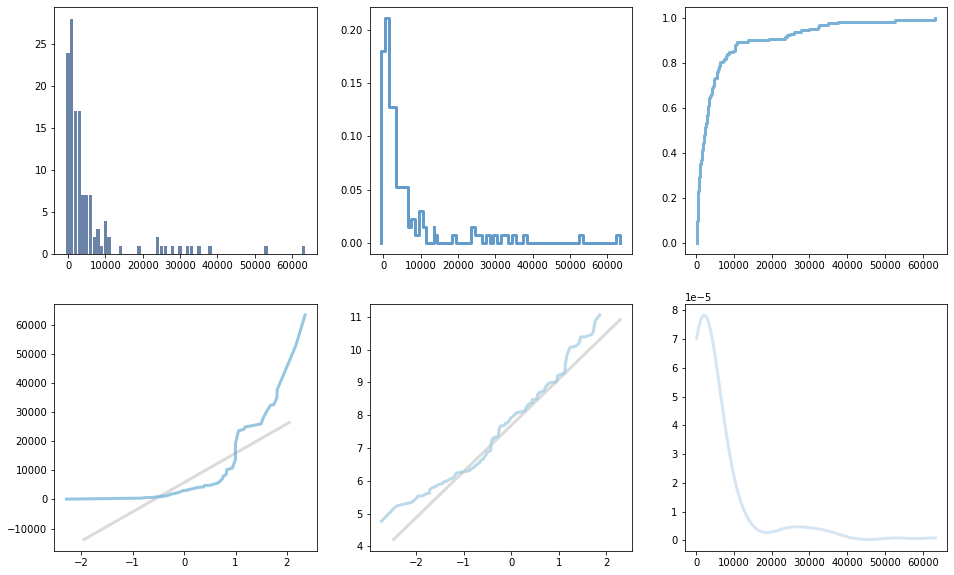

In [22]:
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(histGC)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmfGC)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdfGC)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(dfLE["GDP_per_Capita"])
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(dfLE["GDP_per_Capita"]))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(dfLE["GDP_per_Capita"])
thinkplot.Pdf(pdf)
thinkplot.Config()

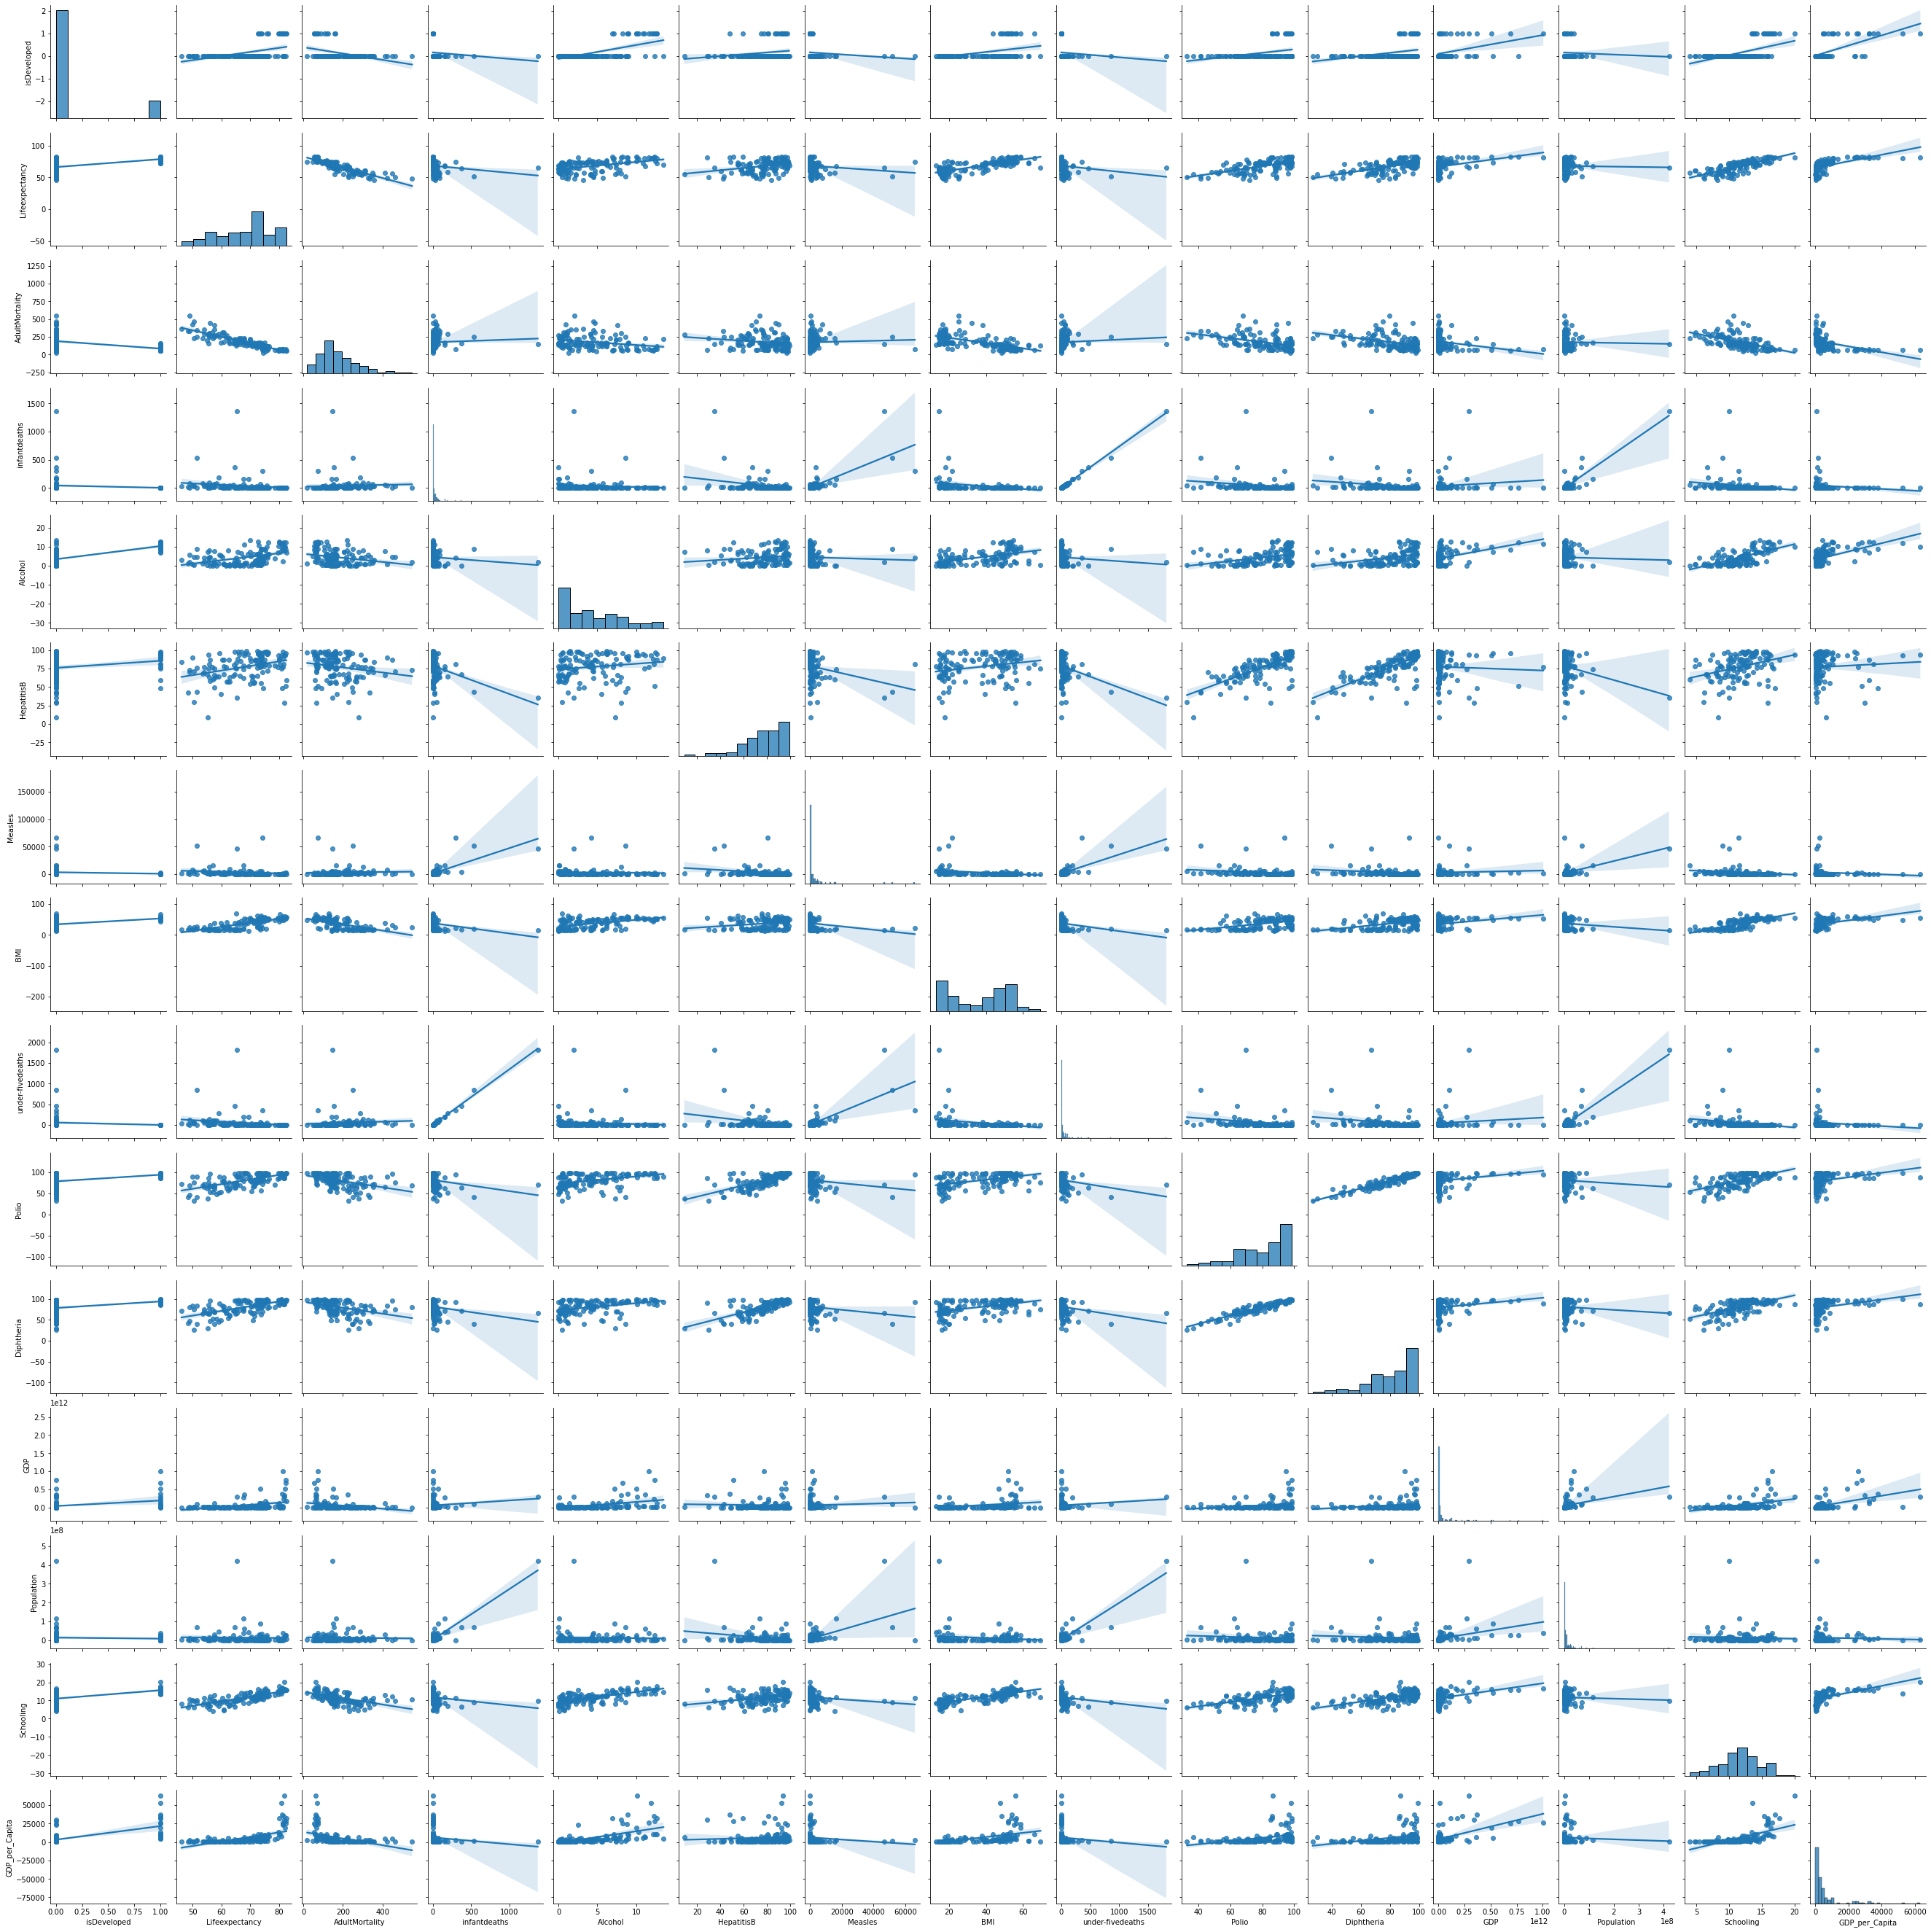

In [28]:
sns.pairplot(dfLE, dropna=True, kind="reg")
plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [24]:
#Analytical for Schooling
histS = thinkstats2.Hist(round(dfLE["Schooling"]))
pmfS = thinkstats2.Pmf(round(dfLE["Schooling"]))
cdfS = thinkstats2.Cdf(dfLE["Schooling"])

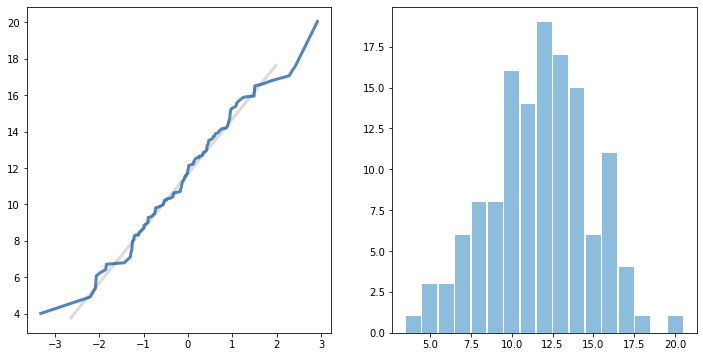

In [25]:
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(dfLE["Schooling"])
thinkplot.SubPlot(2)
thinkplot.Hist(histS)
thinkplot.Config()

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [7]:
#Analytical for GDP/capita

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [8]:
#Visualize correlations. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [9]:
#Calculate correlations and analyze. 